<a href="https://colab.research.google.com/github/oneonethree113/Advanced-Python-Learning/blob/main/LSTM_simulate_sin_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 1, Loss: 0.014965199865400791
Epoch: 2, Loss: 0.0013247401220723987
Epoch: 3, Loss: 0.00017469780868850648
Epoch: 4, Loss: 4.508001438807696e-05
Epoch: 5, Loss: 0.0006327864248305559
Epoch: 6, Loss: 0.006854522507637739
Epoch: 7, Loss: 0.00523221492767334
Epoch: 8, Loss: 0.0023328985553234816
Epoch: 9, Loss: 8.04046358098276e-05
Epoch: 10, Loss: 0.003047044388949871


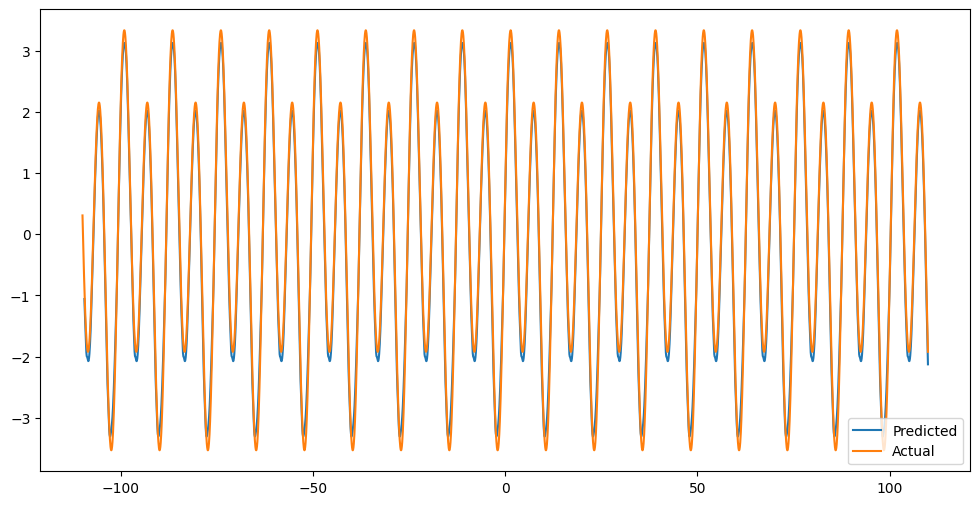

In [26]:

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# LSTM model
class SinLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# Create dataset
t = np.linspace(-100, 100, 4001)
sin_t = 2 * np.sin(t) + np.sin(t / 2) + np.sin(t + 0.3 * np.pi)
sin_t = sin_t.reshape(-1, 1)

# Prepare input and target sequences
seq_len = 10
train_data = [(torch.FloatTensor(sin_t[i:i+seq_len]), torch.FloatTensor(sin_t[i+seq_len])) for i in range(len(sin_t)-seq_len)]

# Model, loss and optimizer
model = SinLSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 10
for epoch in range(epochs):
    for seq, target in train_data:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        prediction = model(seq)
        loss = loss_function(prediction, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

# Testing

test_t = np.linspace(-110, 110, 4401)
modified_sin_test_t = 2 * np.sin(test_t) + np.sin(test_t / 2) + np.sin(test_t + 0.3 * np.pi)
modified_sin_test_t = modified_sin_test_t.reshape(-1, 1)
test_data = [(torch.FloatTensor(modified_sin_test_t[i:i+seq_len]), torch.FloatTensor(modified_sin_test_t[i+seq_len])) for i in range(len(modified_sin_test_t)-seq_len)]

predictions = []
for seq, target in test_data:
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        predictions.append(model(seq).item())

# Plot the results
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_t[10:], predictions, label='Predicted')
plt.plot(test_t, 2 * np.sin(test_t) + np.sin(test_t / 2) + np.sin(test_t + 0.3 * np.pi), label='Actual')
plt.legend()
plt.show()

In [22]:
test_data[0][0]

tensor([[ 0.0442],
        [-0.0057],
        [-0.0557],
        [-0.1055],
        [-0.1551],
        [-0.2043],
        [-0.2530],
        [-0.3010],
        [-0.3483],
        [-0.3947]])

In [21]:
model(test_data[0][0])

tensor([0.1554], grad_fn=<SelectBackward0>)